In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

development = pd.DataFrame({
    "year": [1870, 1880, 1890, 1900, 1920, 1940, 1960, 1980, 2000, 2020],
    "within_4km": [120, 200, 350, 500, 700, 900, 1100, 1300, 1500, 1600],
    "beyond_4km": [20, 60, 100, 200, 400, 800, 1600, 2200, 3000, 3800]
})

plt.style.use("seaborn-v0_8-whitegrid")
sns.set(font_scale=1.1)

# Cell 2: Load data
housing = pd.read_excel(r'C:\Users\Kaydxn Nguyen\Downloads\ExcelFile_BusinessAnalytics_NguyenDangKhoa_s3891931.xlsx')

housing.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,DistanceFromCBD,Postcode,...,NOBathroom,NoCarPark,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,2016-09-03,3.3,3206,...,1,0,120,82.0,1900,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280
1,Albert Park,112 Beaconsfield Pde,3,h,2850000,PI,Buxton,2017-03-04,3.3,3206,...,2,0,211,198.0,1890,Port Phillip City Council,-37.8481,144.9499,Southern Metropolitan,3280


In [2]:
# Create price bins
bins = [0, 1_000_000, 2_000_000, 3_000_000, 4_000_000,
        5_000_000, 6_000_000, 8_000_000]

labels = ["1-1.99", "2-2.99", "3-3.99", "4-4.99", 
          "5-5.99", "6-6.99", "7-7.99"]

housing["price_bin"] = pd.cut(
    housing["Price"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Fix: car park column = NoCarPark
housing["car_cat"] = np.where(
    housing["NoCarPark"] > 2,
    "More than two car parks",
    "Two car parks"
)

# Aggregate only properties with at least 2 car parks
car_price = (
    housing[housing["NoCarPark"] >= 2]
    .groupby(["price_bin", "car_cat"])
    .size()
    .reset_index(name="count")
)

# Pivot table
car_price_pivot = car_price.pivot(
    index="price_bin",
    columns="car_cat",
    values="count"
).fillna(0)

car_price_pivot



C:\Users\Kaydxn Nguyen\AppData\Local\Temp\ipykernel_16080\2860719435.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["price_bin", "car_cat"])


car_cat,More than two car parks,Two car parks
price_bin,,
1-1.99,24,94
2-2.99,8,45
3-3.99,3,21
4-4.99,6,6
5-5.99,1,2
6-6.99,0,1
7-7.99,1,0


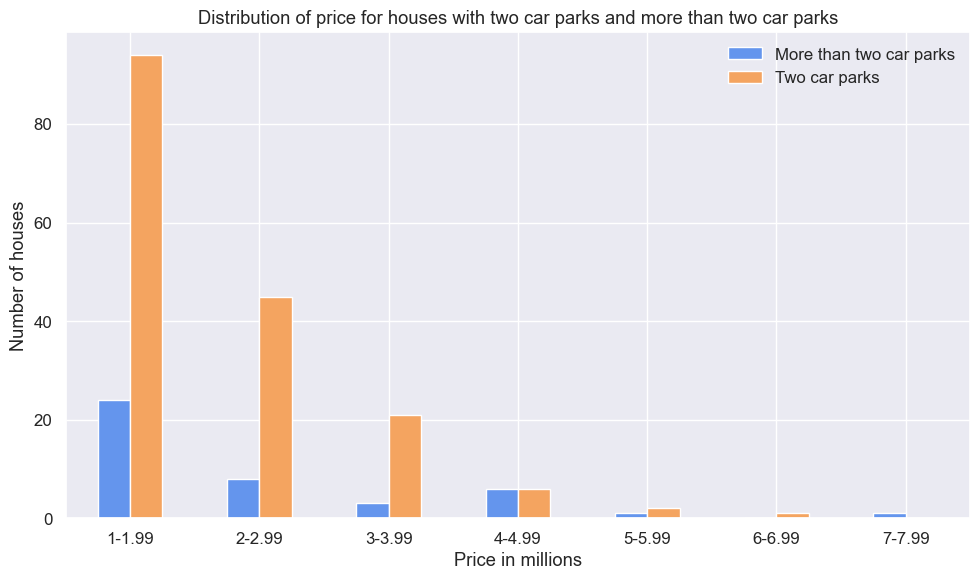

In [3]:
ax = car_price_pivot.plot(
    kind="bar",
    figsize=(10, 6),
    color=["cornflowerblue", "sandybrown"][:len(car_price_pivot.columns)]
)

plt.title("Distribution of price for houses with two car parks and more than two car parks")
plt.xlabel("Price in millions")
plt.ylabel("Number of houses")
plt.xticks(rotation=0)
plt.legend(title="")
plt.tight_layout()

# Only save if the folder exists
# Change '../figures/' to any folder you want
plt.savefig("fig01_carparks_price.png", dpi=300)

plt.show()



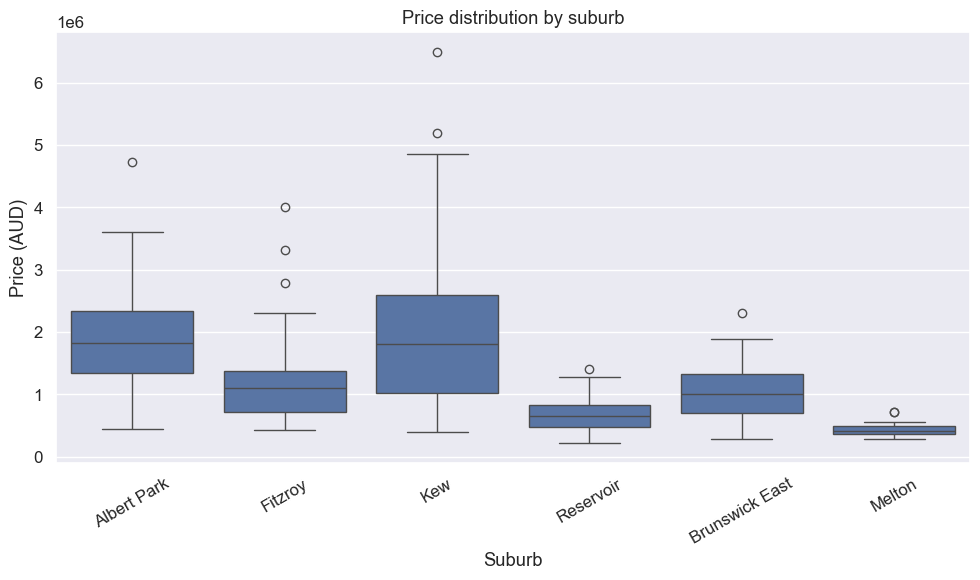

In [4]:
# Cell 5: Boxplot price by suburb (FIXED)

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=housing,
    x="Suburb",      # FIXED
    y="Price"        # FIXED
)

plt.title("Price distribution by suburb")
plt.xlabel("Suburb")
plt.ylabel("Price (AUD)")
plt.xticks(rotation=30)
plt.tight_layout()

# Save file safely (write to current folder)
plt.savefig("fig02_price_boxplot_suburb.png", dpi=300)

plt.show()



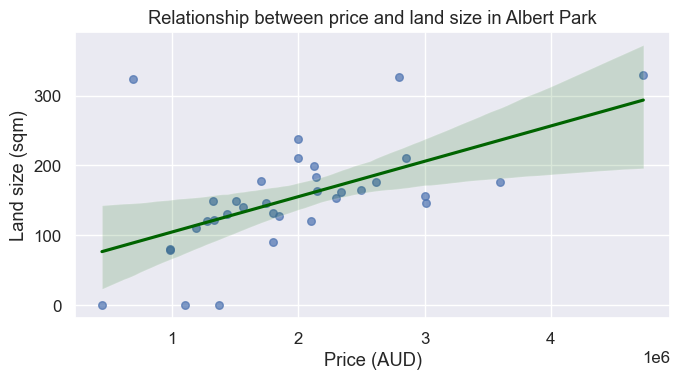

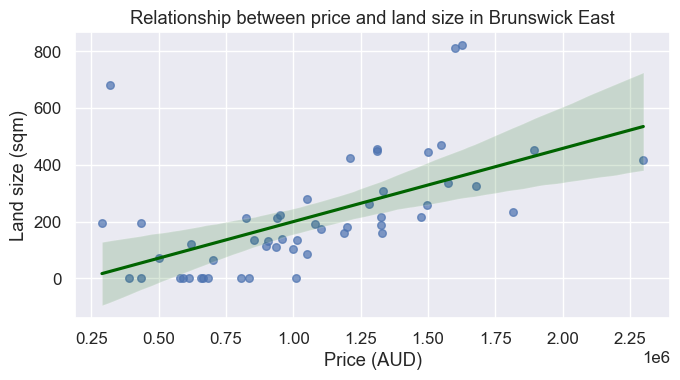

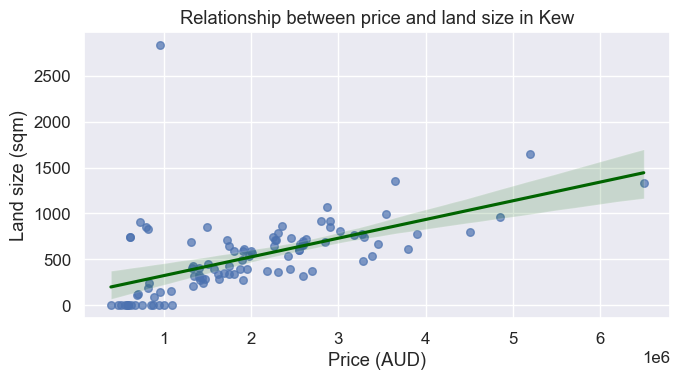

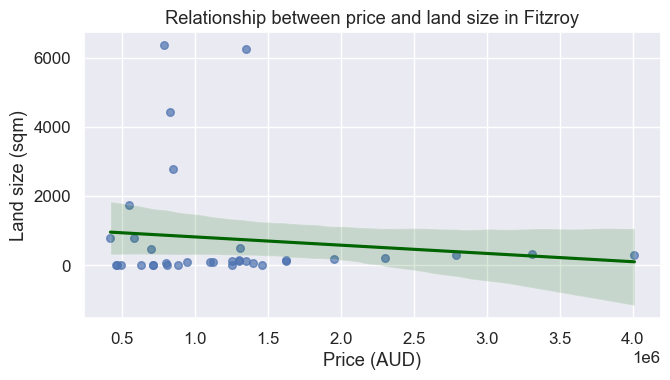

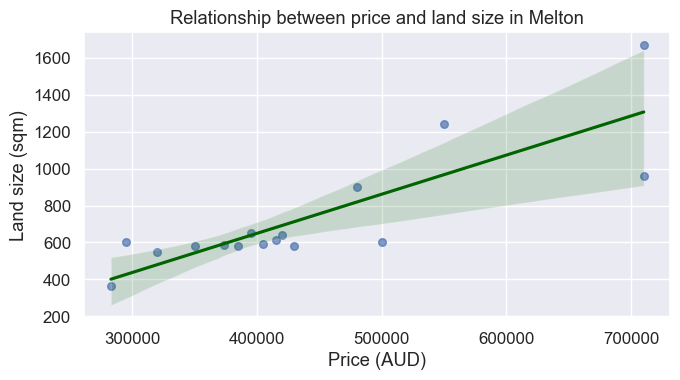

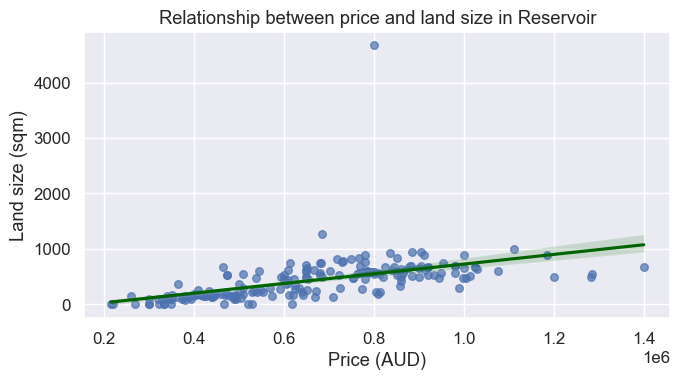

In [5]:
# Cell 6: Helper function for scatter with trendline

def plot_price_landsize_for_suburb(df, suburb_name, filename):
    subset = df[df["Suburb"] == suburb_name]   # FIXED

    plt.figure(figsize=(7, 4))
    sns.regplot(
        data=subset,
        x="Price",                             # FIXED
        y="Landsize",                          # FIXED
        scatter_kws={"alpha": 0.7, "s": 30},
        line_kws={"color": "darkgreen"}
    )
    plt.title(f"Relationship between price and land size in {suburb_name}")
    plt.xlabel("Price (AUD)")
    plt.ylabel("Land size (sqm)")
    plt.tight_layout()

    # SAFER save path — saves into current folder
    plt.savefig(filename, dpi=300)
    plt.show()


# Cell 7: Generate plots for each suburb

for suburb, fname in [
    ("Albert Park", "fig03_price_landsize_albertpark.png"),
    ("Brunswick East", "fig04_price_landsize_brunswick_east.png"),
    ("Kew", "fig05_price_landsize_kew.png"),
    ("Fitzroy", "fig06_price_landsize_fitzroy.png"),
    ("Melton", "fig07_price_landsize_melton.png"),
    ("Reservoir", "fig08_price_landsize_reservoir.png"),
]:
    plot_price_landsize_for_suburb(housing, suburb, fname)



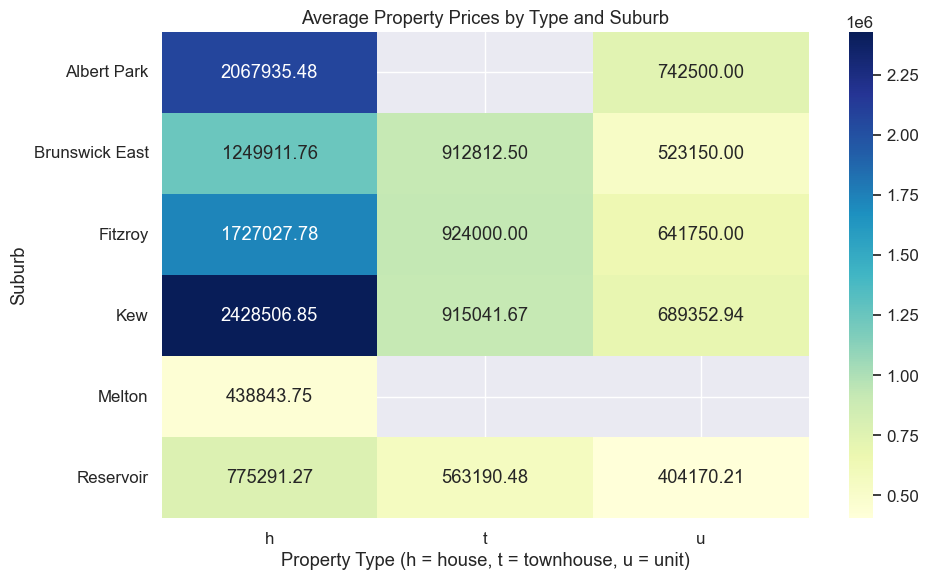

In [6]:
# Cell 8: Pivot table of average price (FIXED)

pivot_price = (
    housing
    .groupby(["Suburb", "Type"])["Price"]   # FIXED column names
    .mean()
    .reset_index()
    .pivot(index="Suburb", columns="Type", values="Price")
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_price,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu"
)

plt.title("Average Property Prices by Type and Suburb")
plt.xlabel("Property Type (h = house, t = townhouse, u = unit)")
plt.ylabel("Suburb")
plt.tight_layout()

# Save locally (safe)
plt.savefig("fig09_avg_price_heatmap.png", dpi=300)

plt.show()


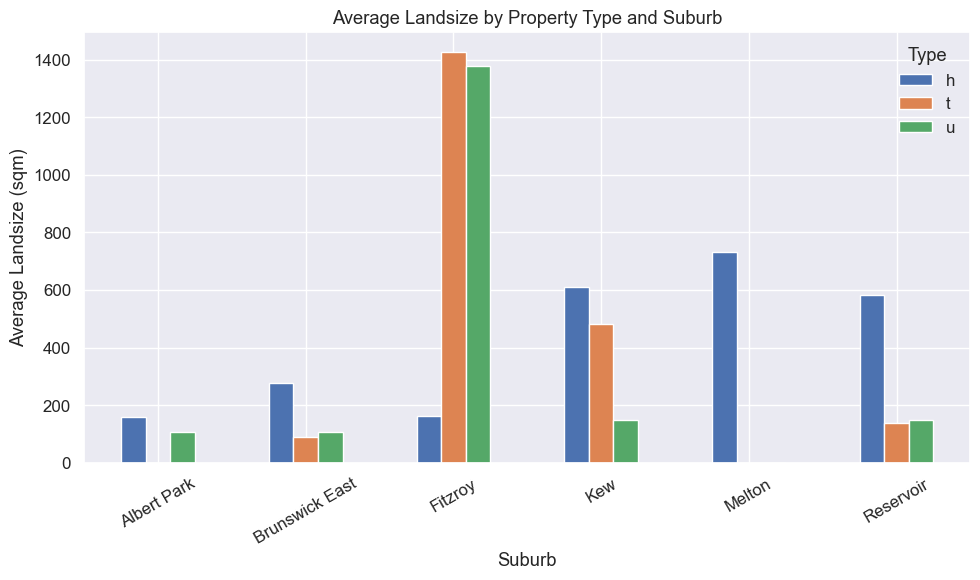

In [7]:
# Cell 9: Average landsize (FIXED)

pivot_land = (
    housing
    .groupby(["Suburb", "Type"])["Landsize"]   # FIXED column names
    .mean()
    .reset_index()
    .pivot(index="Suburb", columns="Type", values="Landsize")
)

pivot_land.plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Average Landsize by Property Type and Suburb")
plt.xlabel("Suburb")
plt.ylabel("Average Landsize (sqm)")
plt.xticks(rotation=30)
plt.tight_layout()

# Save safely in working folder
plt.savefig("fig10_avg_landsize_bar.png", dpi=300)

plt.show()



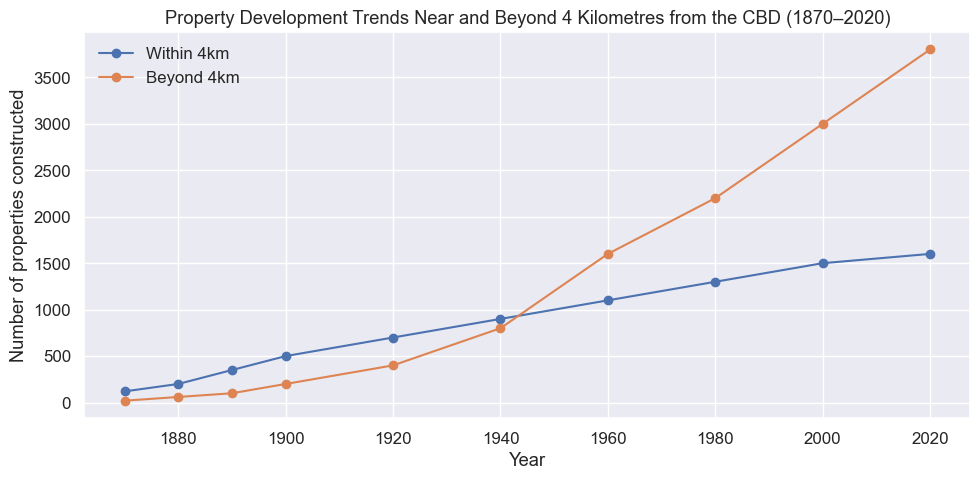

In [8]:
import os
os.makedirs("figures", exist_ok=True)

plt.figure(figsize=(10, 5))

plt.plot(development["year"], development["within_4km"],
         marker="o", label="Within 4km")

plt.plot(development["year"], development["beyond_4km"],
         marker="o", label="Beyond 4km")

plt.title("Property Development Trends Near and Beyond 4 Kilometres from the CBD (1870–2020)")
plt.xlabel("Year")
plt.ylabel("Number of properties constructed")
plt.legend()
plt.tight_layout()
plt.savefig("figures/fig11_development_trends.png", dpi=300)
plt.show()


